In [1]:
import os
import struct
import numpy as np
import sys
import gzip
import shutil
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid,train_test_split
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings("ignore")

### Generate the noisy sin data and plot them 

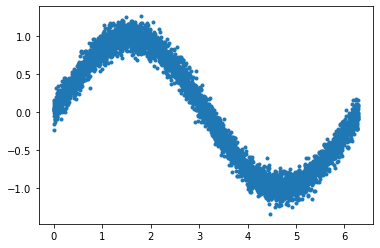

In [10]:
n_samples=5000
x_values=np.random.uniform(low=0,high=2*np.pi,size=n_samples)
sin_wave=np.sin(x_values)+(0.1*np.random.randn(x_values.shape[0]))
plt.plot(x_values,sin_wave,'.')
plt.show()

### Defining the MLP 

To define the MLP the class MLPRegressor from sklearn has been used (see https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html), the parameter n_iter_no_change has been set equal to the number of epochs to be sure that the training procedure will run till the end. 

In [11]:
class MLP():
    
    def _compute_cost(self, y, output):
        
        squared_weights_sum=0
        weights=np.array(self.mlp.coefs_)
        
        for layer_weights in weights:
            squared_weights_sum+=np.sum(layer_weights**2)
            
        L2_term = (self.l2 *
                   (squared_weights_sum))
        
        cost = np.sum(np.square(output-y))/output.shape[0] + L2_term
        return cost

    
    def __init__(self,n_hidden=100,seed=2,l2 = 0.001,epochs = 80,eta = 0.005,shuffle = True, minibatch_size = 100):
        
        self.n_hidden=n_hidden
        self.seed=seed
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatch_size = minibatch_size
        self.mlp=None
        
    def train(self,X_train,y_train,X_validation,y_validation):
        
        loss_curve_training=[]
        loss_curve_validation=[]
        
        epoch_strlen = len(str(self.epochs))
        self.eval_ = {'cost': [], 'train_mse': [], 'valid_mse': []}
        
        self.mlp=MLPRegressor(hidden_layer_sizes=self.n_hidden,activation='relu',max_iter=self.epochs,solver='adam',
                                shuffle=self.shuffle,
                                batch_size=self.minibatch_size,learning_rate_init=self.eta,verbose=False,alpha=self.l2,
                                n_iter_no_change=self.epochs)
        
        for i in range(self.epochs):
            
            self.mlp.partial_fit(X_train,y_train)
            y_pred_training=self.predict(X_train)
            y_pred_validation=self.predict(X_validation)
            mse_training=np.mean(np.square(y_train-y_pred_training))
            mse_validation=np.mean(np.square(y_validation-y_pred_validation))
            
            loss_curve_training.append(mse_training)
            loss_curve_validation.append(mse_validation)
            
            cost = self._compute_cost(y=y_train,
                                      output=y_pred_training)
            

            sys.stderr.write('\r%0*d/%d | Cost: %.2f '
                             '| Train/Valid MSE.: %.2f/%.2f ' %
                             (epoch_strlen, i+1, self.epochs, cost,
                              mse_training, mse_validation))
            sys.stderr.flush()

            self.eval_['cost'].append(cost)
            self.eval_['train_mse'].append(mse_training)
            self.eval_['valid_mse'].append(mse_validation)
        
    def evaluate(self,X,y):
        
        y_pred=self.predict(X)
        mse=np.mean(np.square(y-y_pred))
        print("mean squared error:{}".format(mse))
        
    def predict(self,X):
        
        if(self.mlp==None):
            print("model not trained")
        else:
            predictions=self.mlp.predict(X)
        
        return predictions
